In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [4]:
data.columns

Index(['label', 'X_rms', 'X_std', 'Y_min', 'Y_max', 'Y_range', 'Y_rms',
       'Y_std', 'Z_min', 'Z_max', 'Z_range', 'Z_rms', 'Z_std', 'X_jerk_rms',
       'X_jerk_std', 'Y_jerk_min', 'Y_jerk_max', 'Y_jerk_range', 'Y_jerk_rms',
       'Y_jerk_std', 'Z_jerk_min', 'Z_jerk_max', 'Z_jerk_range', 'Z_jerk_rms',
       'Z_jerk_std', 'total_jerk_min', 'total_jerk_max', 'total_jerk_range',
       'total_jerk_rms', 'total_jerk_std', 'SMA', 'X_entropy', 'Y_entropy',
       'Z_entropy'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [6]:
x=data.drop(['label'], axis=1)
y=data['label']

In [7]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [8]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 33), (1121, 33))

In [9]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 33), (169, 33))

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-12-09 12:53:13.404480: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-09 12:53:13.405880: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 12:53:13.428512: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 12:53:13.428538: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 12:53:13.428553: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [11]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
model = Sequential([
    Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

In [13]:
initial_learning_rate = 0.01
lr_schedule = ExponentialDecay(
    initial_learning_rate,      # Starting learning rate
    decay_steps=1000,         # How often to decay the learning rate
    decay_rate=0.96,            # The decay rate
    staircase=True              # Apply decay in discrete steps
)

# early_stopping = EarlyStopping(monitor='val_loss', patience=70, restore_best_weights=True)

In [14]:
model.compile(optimizer=SGD(learning_rate=lr_schedule, 
                            momentum=0.97, 
                            nesterov=True),  # Enable Nesterov momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# model.compile(optimizer=Adam(), 
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train,
                                epochs=500,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/500
41/41 - 1s - loss: 1.9849 - accuracy: 0.1821 - val_loss: 1.8958 - val_accuracy: 0.2342 - 614ms/epoch - 15ms/step
Epoch 2/500
41/41 - 0s - loss: 1.8492 - accuracy: 0.2594 - val_loss: 1.8259 - val_accuracy: 0.2437 - 87ms/epoch - 2ms/step
Epoch 3/500
41/41 - 0s - loss: 1.7633 - accuracy: 0.3290 - val_loss: 1.7352 - val_accuracy: 0.3204 - 86ms/epoch - 2ms/step
Epoch 4/500
41/41 - 0s - loss: 1.6802 - accuracy: 0.3592 - val_loss: 1.6424 - val_accuracy: 0.3729 - 85ms/epoch - 2ms/step
Epoch 5/500
41/41 - 0s - loss: 1.6155 - accuracy: 0.3898 - val_loss: 1.5941 - val_accuracy: 0.3813 - 88ms/epoch - 2ms/step
Epoch 6/500
41/41 - 0s - loss: 1.5755 - accuracy: 0.3975 - val_loss: 1.5328 - val_accuracy: 0.4034 - 86ms/epoch - 2ms/step
Epoch 7/500
41/41 - 0s - loss: 1.5197 - accuracy: 0.4178 - val_loss: 1.4802 - val_accuracy: 0.4212 - 88ms/epoch - 2ms/step
Epoch 8/500
41/41 - 0s - loss: 1.4915 - accuracy: 0.4331 - val_loss: 1.4040 - val_accuracy: 0.4548 - 94ms/epoch - 2ms/step
Epoch 9/500
41

Epoch 68/500
41/41 - 0s - loss: 0.9741 - accuracy: 0.6362 - val_loss: 0.8690 - val_accuracy: 0.6954 - 87ms/epoch - 2ms/step
Epoch 69/500
41/41 - 0s - loss: 0.9449 - accuracy: 0.6515 - val_loss: 0.8365 - val_accuracy: 0.7059 - 86ms/epoch - 2ms/step
Epoch 70/500
41/41 - 0s - loss: 0.9454 - accuracy: 0.6561 - val_loss: 0.8445 - val_accuracy: 0.6880 - 86ms/epoch - 2ms/step
Epoch 71/500
41/41 - 0s - loss: 0.9273 - accuracy: 0.6465 - val_loss: 0.8620 - val_accuracy: 0.6733 - 87ms/epoch - 2ms/step
Epoch 72/500
41/41 - 0s - loss: 0.9267 - accuracy: 0.6530 - val_loss: 0.8480 - val_accuracy: 0.6859 - 86ms/epoch - 2ms/step
Epoch 73/500
41/41 - 0s - loss: 0.9177 - accuracy: 0.6679 - val_loss: 0.8403 - val_accuracy: 0.6933 - 85ms/epoch - 2ms/step
Epoch 74/500
41/41 - 0s - loss: 0.9090 - accuracy: 0.6783 - val_loss: 0.8520 - val_accuracy: 0.6933 - 84ms/epoch - 2ms/step
Epoch 75/500
41/41 - 0s - loss: 0.9280 - accuracy: 0.6546 - val_loss: 0.8426 - val_accuracy: 0.6975 - 85ms/epoch - 2ms/step
Epoch 76

Epoch 134/500
41/41 - 0s - loss: 0.8106 - accuracy: 0.7119 - val_loss: 0.7721 - val_accuracy: 0.7300 - 87ms/epoch - 2ms/step
Epoch 135/500
41/41 - 0s - loss: 0.7671 - accuracy: 0.7280 - val_loss: 0.7457 - val_accuracy: 0.7153 - 86ms/epoch - 2ms/step
Epoch 136/500
41/41 - 0s - loss: 0.7548 - accuracy: 0.7246 - val_loss: 0.7188 - val_accuracy: 0.7426 - 85ms/epoch - 2ms/step
Epoch 137/500
41/41 - 0s - loss: 0.7435 - accuracy: 0.7406 - val_loss: 0.7394 - val_accuracy: 0.7384 - 85ms/epoch - 2ms/step
Epoch 138/500
41/41 - 0s - loss: 0.7486 - accuracy: 0.7200 - val_loss: 0.7303 - val_accuracy: 0.7374 - 85ms/epoch - 2ms/step
Epoch 139/500
41/41 - 0s - loss: 0.7288 - accuracy: 0.7487 - val_loss: 0.7459 - val_accuracy: 0.7353 - 86ms/epoch - 2ms/step
Epoch 140/500
41/41 - 0s - loss: 0.7662 - accuracy: 0.7242 - val_loss: 0.7261 - val_accuracy: 0.7426 - 86ms/epoch - 2ms/step
Epoch 141/500
41/41 - 0s - loss: 0.7496 - accuracy: 0.7307 - val_loss: 0.7488 - val_accuracy: 0.7500 - 85ms/epoch - 2ms/step


Epoch 200/500
41/41 - 0s - loss: 0.6327 - accuracy: 0.7728 - val_loss: 0.6723 - val_accuracy: 0.7616 - 87ms/epoch - 2ms/step
Epoch 201/500
41/41 - 0s - loss: 0.6546 - accuracy: 0.7651 - val_loss: 0.6765 - val_accuracy: 0.7637 - 86ms/epoch - 2ms/step
Epoch 202/500
41/41 - 0s - loss: 0.6404 - accuracy: 0.7708 - val_loss: 0.6800 - val_accuracy: 0.7521 - 84ms/epoch - 2ms/step
Epoch 203/500
41/41 - 0s - loss: 0.6541 - accuracy: 0.7640 - val_loss: 0.6624 - val_accuracy: 0.7668 - 85ms/epoch - 2ms/step
Epoch 204/500
41/41 - 0s - loss: 0.6482 - accuracy: 0.7601 - val_loss: 0.6746 - val_accuracy: 0.7689 - 84ms/epoch - 2ms/step
Epoch 205/500
41/41 - 0s - loss: 0.6344 - accuracy: 0.7747 - val_loss: 0.6726 - val_accuracy: 0.7637 - 87ms/epoch - 2ms/step
Epoch 206/500
41/41 - 0s - loss: 0.6308 - accuracy: 0.7804 - val_loss: 0.6867 - val_accuracy: 0.7595 - 87ms/epoch - 2ms/step
Epoch 207/500
41/41 - 0s - loss: 0.6509 - accuracy: 0.7705 - val_loss: 0.6935 - val_accuracy: 0.7458 - 84ms/epoch - 2ms/step


Epoch 266/500
41/41 - 0s - loss: 0.5526 - accuracy: 0.7984 - val_loss: 0.6184 - val_accuracy: 0.7931 - 87ms/epoch - 2ms/step
Epoch 267/500
41/41 - 0s - loss: 0.5742 - accuracy: 0.7919 - val_loss: 0.6413 - val_accuracy: 0.7763 - 90ms/epoch - 2ms/step
Epoch 268/500
41/41 - 0s - loss: 0.5649 - accuracy: 0.8053 - val_loss: 0.6259 - val_accuracy: 0.7794 - 85ms/epoch - 2ms/step
Epoch 269/500
41/41 - 0s - loss: 0.5851 - accuracy: 0.7907 - val_loss: 0.6231 - val_accuracy: 0.7920 - 86ms/epoch - 2ms/step
Epoch 270/500
41/41 - 0s - loss: 0.5362 - accuracy: 0.8068 - val_loss: 0.6394 - val_accuracy: 0.7899 - 85ms/epoch - 2ms/step
Epoch 271/500
41/41 - 0s - loss: 0.5569 - accuracy: 0.8080 - val_loss: 0.6320 - val_accuracy: 0.7836 - 90ms/epoch - 2ms/step
Epoch 272/500
41/41 - 0s - loss: 0.5602 - accuracy: 0.8026 - val_loss: 0.6333 - val_accuracy: 0.7857 - 86ms/epoch - 2ms/step
Epoch 273/500
41/41 - 0s - loss: 0.5525 - accuracy: 0.8091 - val_loss: 0.6264 - val_accuracy: 0.7931 - 86ms/epoch - 2ms/step


Epoch 332/500
41/41 - 0s - loss: 0.5300 - accuracy: 0.8194 - val_loss: 0.6249 - val_accuracy: 0.7941 - 87ms/epoch - 2ms/step
Epoch 333/500
41/41 - 0s - loss: 0.4858 - accuracy: 0.8290 - val_loss: 0.6174 - val_accuracy: 0.7826 - 86ms/epoch - 2ms/step
Epoch 334/500
41/41 - 0s - loss: 0.5163 - accuracy: 0.8152 - val_loss: 0.6237 - val_accuracy: 0.7826 - 86ms/epoch - 2ms/step
Epoch 335/500
41/41 - 0s - loss: 0.5122 - accuracy: 0.8236 - val_loss: 0.6217 - val_accuracy: 0.7931 - 85ms/epoch - 2ms/step
Epoch 336/500
41/41 - 0s - loss: 0.4706 - accuracy: 0.8275 - val_loss: 0.6406 - val_accuracy: 0.7805 - 85ms/epoch - 2ms/step
Epoch 337/500
41/41 - 0s - loss: 0.4935 - accuracy: 0.8275 - val_loss: 0.6195 - val_accuracy: 0.7910 - 86ms/epoch - 2ms/step
Epoch 338/500
41/41 - 0s - loss: 0.4973 - accuracy: 0.8225 - val_loss: 0.6254 - val_accuracy: 0.7920 - 86ms/epoch - 2ms/step
Epoch 339/500
41/41 - 0s - loss: 0.5018 - accuracy: 0.8221 - val_loss: 0.6476 - val_accuracy: 0.7910 - 85ms/epoch - 2ms/step


Epoch 398/500
41/41 - 0s - loss: 0.4366 - accuracy: 0.8588 - val_loss: 0.6021 - val_accuracy: 0.8025 - 87ms/epoch - 2ms/step
Epoch 399/500
41/41 - 0s - loss: 0.4401 - accuracy: 0.8439 - val_loss: 0.6122 - val_accuracy: 0.8015 - 87ms/epoch - 2ms/step
Epoch 400/500
41/41 - 0s - loss: 0.4249 - accuracy: 0.8489 - val_loss: 0.6183 - val_accuracy: 0.8088 - 88ms/epoch - 2ms/step
Epoch 401/500
41/41 - 0s - loss: 0.4476 - accuracy: 0.8424 - val_loss: 0.6376 - val_accuracy: 0.8078 - 87ms/epoch - 2ms/step
Epoch 402/500
41/41 - 0s - loss: 0.4705 - accuracy: 0.8359 - val_loss: 0.6009 - val_accuracy: 0.7941 - 85ms/epoch - 2ms/step
Epoch 403/500
41/41 - 0s - loss: 0.4596 - accuracy: 0.8386 - val_loss: 0.5900 - val_accuracy: 0.8078 - 86ms/epoch - 2ms/step
Epoch 404/500
41/41 - 0s - loss: 0.4340 - accuracy: 0.8454 - val_loss: 0.6121 - val_accuracy: 0.7920 - 87ms/epoch - 2ms/step
Epoch 405/500
41/41 - 0s - loss: 0.4552 - accuracy: 0.8378 - val_loss: 0.6162 - val_accuracy: 0.8004 - 84ms/epoch - 2ms/step


Epoch 464/500
41/41 - 0s - loss: 0.4021 - accuracy: 0.8497 - val_loss: 0.5991 - val_accuracy: 0.8088 - 92ms/epoch - 2ms/step
Epoch 465/500
41/41 - 0s - loss: 0.3992 - accuracy: 0.8542 - val_loss: 0.5922 - val_accuracy: 0.8130 - 94ms/epoch - 2ms/step
Epoch 466/500
41/41 - 0s - loss: 0.3852 - accuracy: 0.8646 - val_loss: 0.5948 - val_accuracy: 0.8109 - 91ms/epoch - 2ms/step
Epoch 467/500
41/41 - 0s - loss: 0.3773 - accuracy: 0.8680 - val_loss: 0.5941 - val_accuracy: 0.7983 - 90ms/epoch - 2ms/step
Epoch 468/500
41/41 - 0s - loss: 0.4163 - accuracy: 0.8569 - val_loss: 0.5947 - val_accuracy: 0.8099 - 91ms/epoch - 2ms/step
Epoch 469/500
41/41 - 0s - loss: 0.3973 - accuracy: 0.8585 - val_loss: 0.5844 - val_accuracy: 0.8120 - 91ms/epoch - 2ms/step
Epoch 470/500
41/41 - 0s - loss: 0.3886 - accuracy: 0.8520 - val_loss: 0.6170 - val_accuracy: 0.8057 - 94ms/epoch - 2ms/step
Epoch 471/500
41/41 - 0s - loss: 0.3918 - accuracy: 0.8642 - val_loss: 0.6018 - val_accuracy: 0.8120 - 94ms/epoch - 2ms/step


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               17408     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

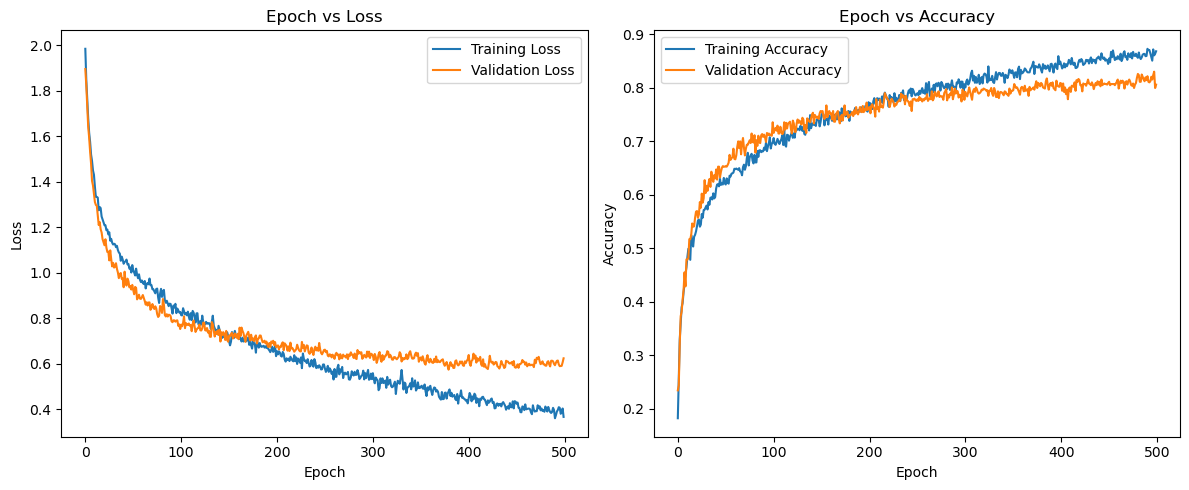

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 95.56%
Test Accuracy: 81.07%


6/6 [==============================] - 0s 1ms/step


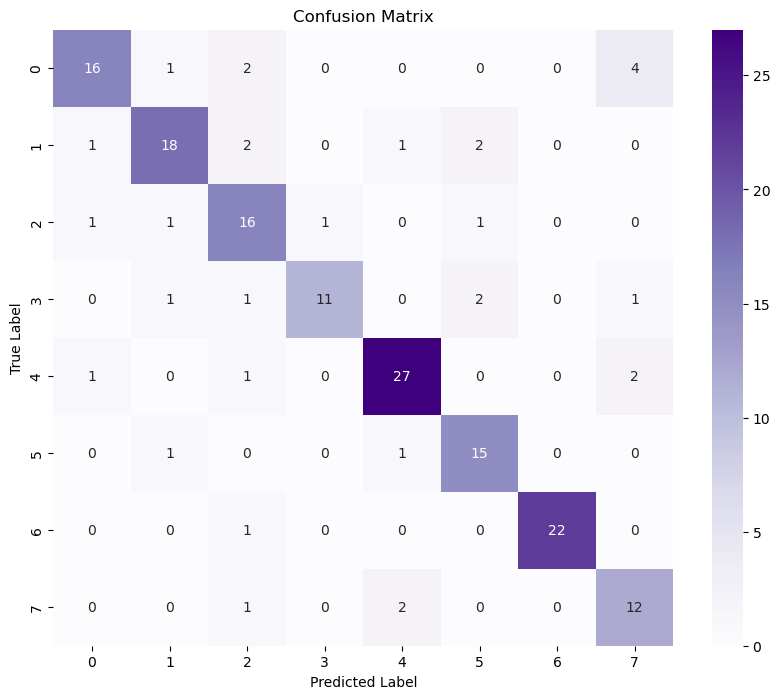

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.82      0.75      0.78        24
           2       0.67      0.80      0.73        20
           3       0.92      0.69      0.79        16
           4       0.87      0.87      0.87        31
           5       0.75      0.88      0.81        17
           6       1.00      0.96      0.98        23
           7       0.63      0.80      0.71        15

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.82      0.81      0.81       169



In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
